In [2]:
#In this project we will be exploring Netflix Dataset has information about the TV Shows and Movies available on Netflix.
#We will try to create a model that will help predict user preferences or content success factors..

#These are the main Features/Columns available in the dataset :
#Show_Id: A unique identifier assigned to each Netflix title (e.g., s1, s2…).
#Category: Indicates whether the content is a Movie or a TV Show.
#Title: The name of the movie or TV show as it appears on Netflix.
#Director: The name(s) of the director(s). This can be empty for some TV shows or content with no known director.
#Cast: List of main actors and actresses featured in the title. It may contain multiple names, separated by commas.
#Country: The country (or countries) where the content was produced or released.
#Release_Date: The date on which the content was made available on Netflix.
#Rating: The maturity rating of the content (e.g., TV-MA, PG-13, R), indicating the appropriate audience.
#Duration: For movies, this shows the length in minutes (e.g., "93 min"). For TV shows, it displays the number of seasons (e.g., "4 Seasons").
#Type: Genres or categories that describe the content (e.g., "Dramas", "Horror Movies", "International TV Shows").
#Description: A short synopsis or summary of the movie or TV show.



import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#Import dataset
netflix = pd.read_csv("Netflix Dataset.csv")
netflix.head()                      

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [5]:
netflix.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [6]:
netflix.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

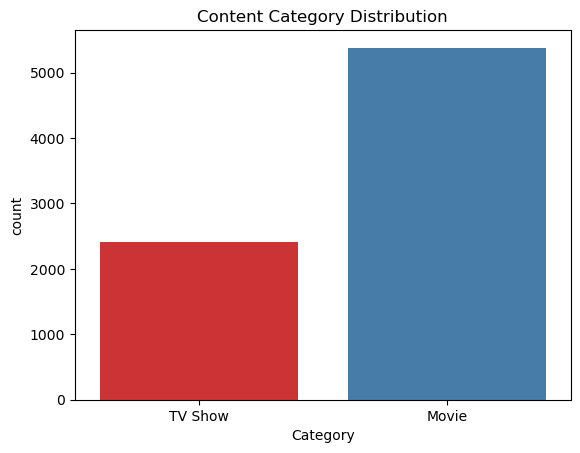

In [7]:
#Data Visualizations
sns.countplot(x='Category',data=netflix,palette='Set1')
plt.title('Content Category Distribution')
plt.show()

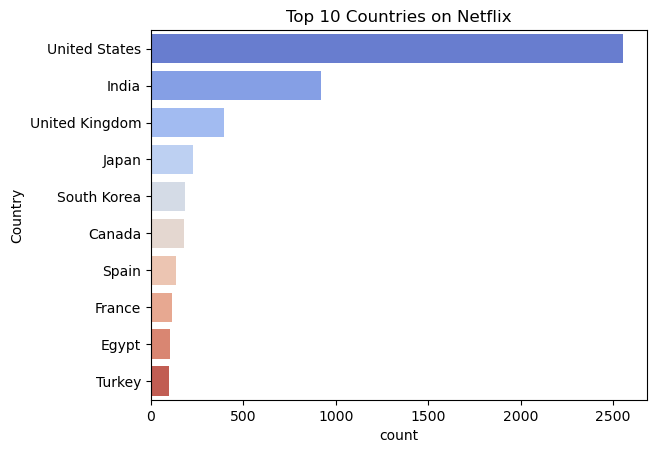

In [8]:
sns.countplot(y='Country',data=netflix,palette='coolwarm',order=netflix['Country'].value_counts().head(10).index)
plt.title('Top 10 Countries on Netflix')
plt.ylabel('Country')
plt.show()

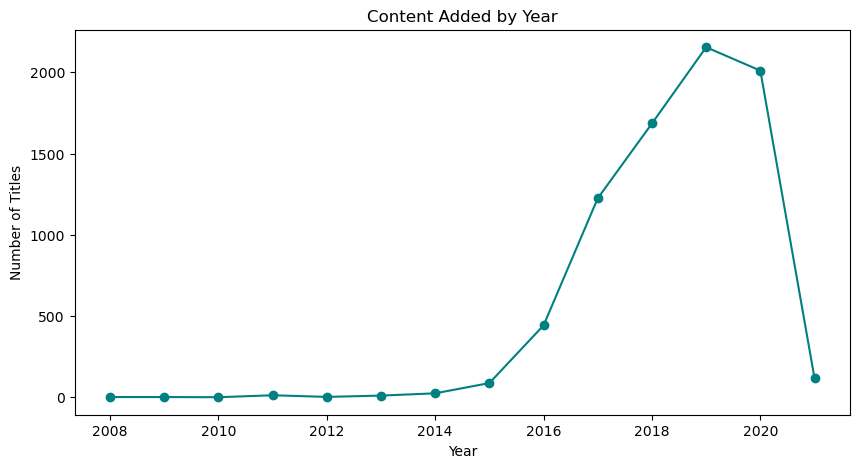

In [9]:
# Remove leading/trailing whitespace
netflix['Release_Date'] = netflix['Release_Date'].str.strip()

# Convert to datetime safely
netflix['Release_Date'] = pd.to_datetime(netflix['Release_Date'], errors='coerce')

# Extract year
netflix['Year_Added'] = netflix['Release_Date'].dt.year

# Plot content count by year
netflix['Year_Added'].value_counts().sort_index().plot(kind='line', marker='o', figsize=(10,5), color='teal')
plt.title('Content Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

Text(0.5, 1.0, 'Distribution of Movie Durations')

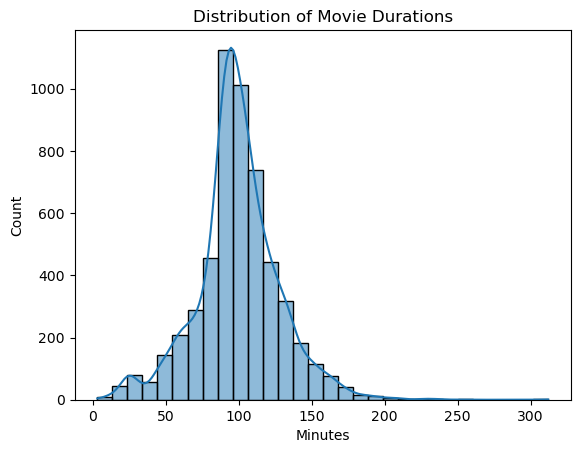

In [10]:
# Separate movies and shows
movies = netflix[netflix['Category'] == 'Movie']
tv_shows = netflix[netflix['Category'] == 'TV Show']

# Extract numeric duration
movies['Minutes'] = movies['Duration'].str.extract('(\d+)').astype(float)
sns.histplot(movies['Minutes'].dropna(), bins=30, kde=True)
plt.title('Distribution of Movie Durations')

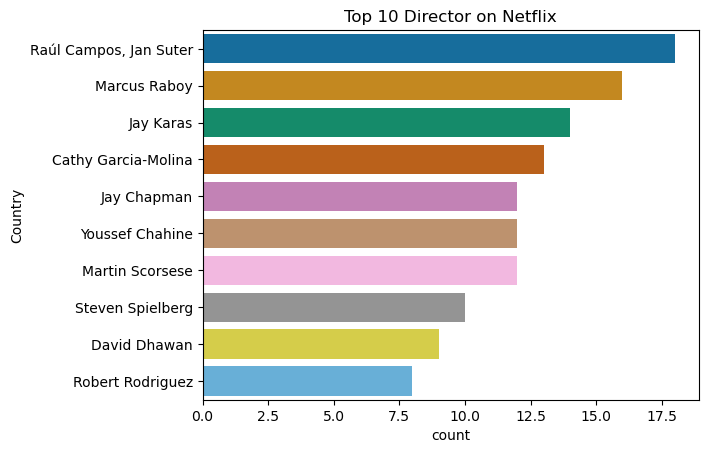

In [11]:
sns.countplot(y='Director',data=netflix,palette='colorblind',order=netflix['Director'].value_counts().head(10).index)
plt.title('Top 10 Director on Netflix')
plt.ylabel('Country')
plt.show()

In [12]:
# Model Building

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier


In [15]:
# Drop rows with missing values
netflix.dropna(inplace=True)

# Convert Release_Date to string to avoid LabelEncoder error
netflix['Release_Date'] = netflix['Release_Date'].astype(str)

# Label Encoding for all columns
le = LabelEncoder()
for col in netflix.columns:
    netflix[col] = le.fit_transform(netflix[col])

# Set Features and Target
X = netflix.drop("Category", axis=1)  # Features
y = netflix["Category"]              # Target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define ML models
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Model Accuracy
print('Accuracy of the model is =', 
      accuracy_score(y_test, y_pred)) 

Accuracy of the model is = 0.9948078920041536


In [16]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       933
           1       0.88      0.97      0.92        30

    accuracy                           0.99       963
   macro avg       0.94      0.98      0.96       963
weighted avg       1.00      0.99      0.99       963



In [17]:
# We can see that Accuracy of the Decision Tree Model is 99.48% which is quite Better.